## Beïnvloedende Factoren Mentale Gezondheid

De mentale gezondheid van studenten is drastisch verslechterd sinds de coronapandemie. Dit is extra zorgelijk, aangezien de WHO in 2017 studenten al bestempelde als een groep met een hogere prevalentie van verminderde mentale gezondheid dan de rest van de bevolking (Zarowski et al., 2024). Het is van enorm belang voor het slagen van deze generatie in het werkveld, dat mogelijke verklaringen van verminderde mentale gesteldheid in kaart worden gebracht, om de maatschappij in de toekomst op de been te houden en deze beter te kunnen behoeden tegen dergelijke mentale problematiek. In figuur 2? worden, aan de hand van onderzochte data, factoren getoond die op het oog invloed hebben op de depressiescore van studenten.

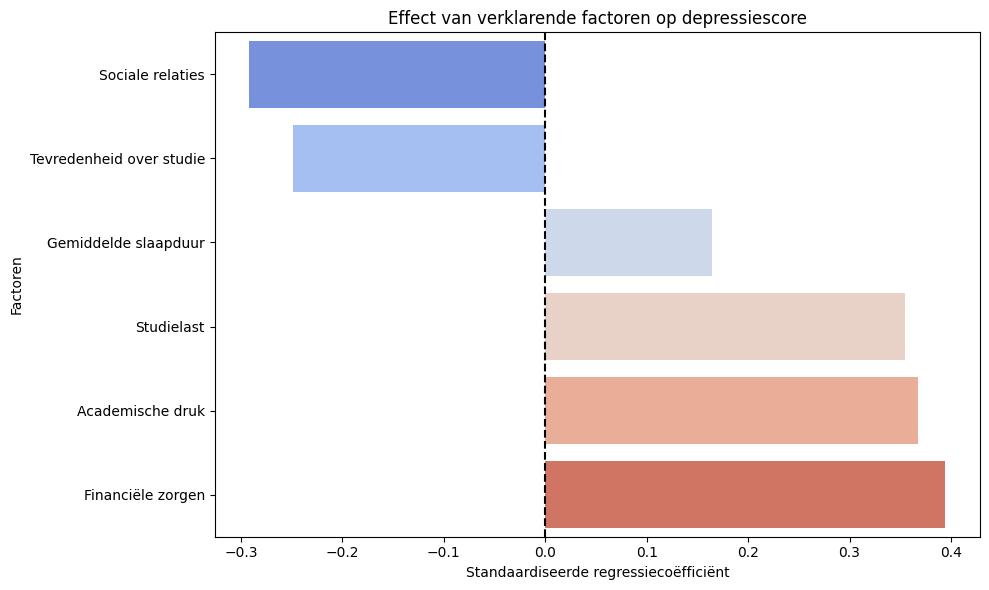

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# ⬇️ Laad je dataset (pas het pad aan naar jouw bestand)
da = pd.read_csv("datasets/MentalHealthSurvey.csv")

# 🔃 Voeg handmatig kolomnamen toe
da.columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year',
    'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'depression', 'anxiety',
    'isolation', 'future_insecurity', 'stress_relief_activities'
]

# 🔢 CGPA converteren naar gemiddelde getal
def convert_cgpa(value):
    if isinstance(value, str) and "-" in value:
        try:
            low, high = value.split("-")
            return (float(low) + float(high)) / 2
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['cgpa'] = da['cgpa'].apply(convert_cgpa)

# 💤 Slaaprange converteren naar getal
def convert_sleep(value):
    if isinstance(value, str) and "-" in value:
        try:
            nums = [int(s.replace("hrs", "").strip()) for s in value.split("-")]
            return sum(nums) / len(nums)
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['average_sleep'] = da['average_sleep'].apply(convert_sleep)

# 🔢 Definieer relevante variabelen
features = [
    'academic_workload',
    'academic_pressure',
    'financial_concerns',
    'study_satisfaction',
    'social_relationships',
    'average_sleep'
]
target = 'depression'

# 🧼 Filter en converteer naar numeriek
reg_df = da[features + [target]].dropna().astype(float)

# 🧪 X en y scheiden
X = reg_df[features]
y = reg_df[target]

# 🧮 Standaardiseren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Lineaire regressie
model = LinearRegression()
model.fit(X_scaled, y)

# 📊 Coëfficiënten berekenen
coefs = pd.Series(model.coef_, index=features).sort_values()

# Vervang variabelnamen door leesbare labels
rename_map = {
    'academic_workload': 'Studielast',
    'academic_pressure': 'Academische druk',
    'financial_concerns': 'Financiële zorgen',
    'study_satisfaction': 'Tevredenheid over studie',
    'social_relationships': 'Sociale relaties',
    'average_sleep': 'Gemiddelde slaapduur'
}
coefs.index = coefs.index.map(rename_map)
bar_df = pd.DataFrame({
    "Variabele": coefs.index,
    "Waarde": coefs.values
})

# Visualisatie
plt.figure(figsize=(10, 6))
# sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm", orient='h')
sns.barplot(
    data=bar_df,
    x="Waarde",
    y="Variabele",
    hue="Variabele",                      # nodig om palette te activeren
    palette=sns.color_palette("coolwarm", len(bar_df)),
    orient="h",
    legend=False
)

plt.axvline(0, color='black', linestyle='--')
plt.title("Effect van verklarende factoren op depressiescore")
plt.xlabel("Standaardiseerde regressiecoëfficiënt")
plt.ylabel("Factoren")
plt.tight_layout()
plt.show()


Figuur 2 toont het een staafdiagram met de gestandaardiseerde regressiecoëfficiënten van zes factoren die mogelijk verband houden met de depressiescore van studenten. De x-as geeft de sterkte en richting van het effect weer, negatieve waarden hebben een negatieve relatie met de depressiescore, wat betekent dat een toename van deze variabele lijdt tot een afname van de depressiescore. Anderzijds beïnvloeden positieve waarden deze score positief, wat duidt op een toename van de depressiescore, naarmate de variabele toene. De y-as zet de onderzochte factoren uiteen. Sociale relaties lijken het sterkst samen te hangen met een lage depressiescore, deze variabele omschrijft de mate waarin studenten sociale verbinding vinden aan de universiteit en zich gezien en gehoord voelen. Daarnaast is er ook een sterk verband tussen de tevredenheid over studie en een verminderde depressiescore. Waardering van studie lijkt dus samen te hangen met een lagere depressiescore. Aan de andere kant hebben een hoge studielast, het ondervinden van academische druk, en met name financiële zorgen een positieve relatie met de depressiescore. Naarmate men meer studielast en academische druk ervaart, variabelen die vaak hand in hand gaan (FIGUUR 3), neemt de depressiescore toe. Een langere gemiddelde slaapduur lijkt hier ook samen te hangen met een kleine toename van de depressiescore, iets wat tegenintuïtief lijkt en ook de literatuur tegenspreekt. Een gezond slaappatroon wordt vaak geassocieerd met verbetering van mentale gezondheid. Echter, is er bij teveel slaap geen sprake van een gezond slaappatroon, wat een mogelijke verklaring kan zijn voor dit gevonden verband (Lee et al., 2024).


## Slaapgedrag

Hoewel in Figuur 2 een langere gemiddelde slaapduur samenhangt met een lichte toename van de depressiescore, is het belangrijk om dit resultaat in perspectief te plaatsen. In Figuur 4 wordt, op basis van een andere dataset, een duidelijk positief verband aangetoond tussen het aantal uren slaap en mentale gezondheid: naarmate studenten meer slapen (tot een gezond niveau), neemt hun mentale welzijn toe. Dit bevestigt bevindingen uit bestaande literatuur waarin voldoende slaap consequent wordt gekoppeld aan betere mentale gezondheid (Lee et al., 2024). De schijnbare tegenstelling met Figuur 2 kan mogelijk worden verklaard door het verschil tussen gezond veel slapen en overmatig slapen, waarbij het laatste vaak een symptoom is van onderliggende psychische klachten.



In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Dataset ophalen
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Filter op leeftijd en geldige waarden
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
df_filtered = df_filtered.dropna(subset=["Mental_Health_Score", "Sleep_Hours_Per_Night", "Gender"])

# Kleuren
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om groepsgemiddelde lijntrace te maken
def get_line_trace(gender=None):
    if gender:
        d = df_filtered[df_filtered["Gender"] == gender]
        label = gender
    else:
        d = df_filtered
        label = "All"

    df_avg = d.groupby("Sleep_Hours_Per_Night")["Mental_Health_Score"].mean().reset_index()

    return go.Scatter(
        x=df_avg["Sleep_Hours_Per_Night"],
        y=df_avg["Mental_Health_Score"],
        mode='lines+markers',
        name=label,
        line=dict(color=colors[label], width=3),
        visible=True if label == "Male" else False  # standaard alleen Male tonen
    )

# Genereer traces
male_line = get_line_trace("Male")
female_line = get_line_trace("Female")
all_line = get_line_trace(None)

# Dropdown-menu (met correcte title.text)
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, False, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"}}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, True, False]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (vrouwen)"}}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle studenten)"}}]),
    dict(label="Allemaal",
         method="update",
         args=[{"visible": [True, True, True]},
               {"title": {"text": "Gemiddelde mentale gezondheid per slaapduur (alle groepen)"}}])
]

# Plot figuur
fig = go.Figure(data=[male_line, female_line, all_line])

fig.update_layout(
    title={"text": "Gemiddelde mentale gezondheid per slaapduur (mannen)"},
    xaxis=dict(
        title="Aantal uren slaap per nacht",
        range=[3, 10], 
        dtick=1,
        fixedrange=True
    ),
    yaxis=dict(
        title="Gemiddelde mentale gezondheidsscore",
        range=[3, 10],      
        dtick=1,
        fixedrange=True
    ),
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.01,             # links in beeld
        xanchor="left",
        y=1.15,             # boven de plot
        yanchor="top"
    )]
)

fig.show()




Figuur 4 toont het verband tussen het aantal uren slaap per nacht (x-as) en de mentale gezondheidsscore van studenten (y-as). Voor zowel mannelijke als vrouwelijke studenten is een duidelijke positieve trend zichtbaar in de regressielijn: de mentale gezondheidsscore neemt toe naarmate studenten meer slapen. Dit wijst erop dat voldoende slaap een beschermende factor vormt voor het mentale welzijn van studenten. Het patroon ondersteunt het idee dat slaaptekort nadelige effecten heeft op de geestelijke gezondheid, terwijl een gezond slaappatroon juist bijdraagt aan psychisch herstel en emotioneel evenwicht.

